# Importando Bibliotecas e Funções

In [1]:
#importando módulos
import functions
from functions import *

import visualization
from visualization import viz_pred

In [2]:
fix_req = "https://v3.football.api-sports.io/fixtures?ids="

# 4. Banco de Estatísticas Históricas de um Campeonato

## 4.1 Verificar a League / ID do Campeonato
https://dashboard.api-football.com/soccer/ids

In [3]:
#cria um dataframe com todas as ligas disponiveis
lg = 'https://v3.football.api-sports.io/leagues'
lg = requests.request("GET", lg, headers=headers, data=payload)
lg = lg.json()
lg = json_normalize(lg['response'])
lg = lg[['league.id','league.name','league.type','country.name']]

#listas países
print(list(enumerate(lg['country.name'].unique())))

#pesquisar país
input_country_name = int(input())
country = lg['country.name'].unique()[input_country_name]

lg_country =  lg[lg['country.name']==country]

[(0, 'World'), (1, 'France'), (2, 'Belgium'), (3, 'Brazil'), (4, 'England'), (5, 'Germany'), (6, 'Italy'), (7, 'Netherlands'), (8, 'Portugal'), (9, 'Spain'), (10, 'Scotland'), (11, 'Albania'), (12, 'Algeria'), (13, 'Palestine'), (14, 'Myanmar'), (15, 'Trinidad-And-Tobago'), (16, 'Ukraine'), (17, 'United-Arab-Emirates'), (18, 'Uruguay'), (19, 'Tunisia'), (20, 'Turkey'), (21, 'Egypt'), (22, 'El-Salvador'), (23, 'Estonia'), (24, 'Georgia'), (25, 'Ghana'), (26, 'Guadeloupe'), (27, 'Guatemala'), (28, 'Greece'), (29, 'Andorra'), (30, 'Argentina'), (31, 'Australia'), (32, 'Austria'), (33, 'Azerbaidjan'), (34, 'Wales'), (35, 'Venezuela'), (36, 'Oman'), (37, 'Jamaica'), (38, 'Jordan'), (39, 'Kazakhstan'), (40, 'Kuwait'), (41, 'Denmark'), (42, 'Honduras'), (43, 'Hong-Kong'), (44, 'Hungary'), (45, 'Lebanon'), (46, 'Luxembourg'), (47, 'Qatar'), (48, 'Surinam'), (49, 'Tajikistan'), (50, 'Barbados'), (51, 'Uganda'), (52, 'Mali'), (53, 'USA'), (54, 'Uzbekistan'), (55, 'Thailand'), (56, 'Faroe-Islands

In [4]:
#pesquisar league
print(list(enumerate(lg_country['league.name'].unique())))
input_league_number = int(input())

league = lg_country['league.name'].unique()[input_league_number]
lg_country_league = lg_country[lg_country['league.name']==league]

[(0, 'Serie A'), (1, 'Serie D'), (2, 'Serie B'), (3, 'Serie C'), (4, 'Acreano'), (5, 'Amapaense'), (6, 'Amazonense'), (7, 'Copa Do Brasil'), (8, 'Brasileiro Women'), (9, 'Alagoano'), (10, 'Baiano - 2'), (11, 'Cearense - 2'), (12, 'Carioca - 2'), (13, 'Baiano - 1'), (14, 'Paraibano'), (15, 'Catarinense - 1'), (16, 'Paulista - A3'), (17, 'Paranaense - 1'), (18, 'Roraimense'), (19, 'Maranhense'), (20, 'Cearense - 1'), (21, 'Brasiliense'), (22, 'Capixaba'), (23, 'Copa do Nordeste'), (24, 'Paranaense - 2'), (25, 'Rondoniense'), (26, 'Potiguar'), (27, 'Copa do Brasil U20'), (28, 'São Paulo Youth Cup'), (29, 'Mineiro - 2'), (30, 'Piauiense'), (31, 'Pernambucano - 1'), (32, 'Sul-Matogrossense'), (33, 'Carioca - 1'), (34, 'Sergipano'), (35, 'Paraense'), (36, 'Goiano - 1'), (37, 'Mineiro - 1'), (38, 'Matogrossense'), (39, 'Tocantinense'), (40, 'Supercopa do Brasil'), (41, 'Paulista - A1'), (42, 'Paulista - A2'), (43, 'Gaúcho - 1'), (44, 'Gaúcho - 2'), (45, 'Copa Verde'), (46, 'CBF Brasileiro U20

In [6]:
#seleciona a league e o range desejado
league = lg_country_league['league.id'].iloc[0]
season = range(2021,2024,1)


## 4.2 Dataframe com todas as partidas da League

In [7]:
#realiza a requisição para obter as partidas
fix_as = []

for i in season:

    fix = 'https://v3.football.api-sports.io/fixtures?league='+str(league)+'&season='+str(i)
    fix = requests.request("GET", fix, headers=headers, data=payload)
    fix = fix.json()
    fix = fix['response']
    fix = json_normalize(fix)
    fix_as.append(fix)
    
fix_as = pd.concat(fix_as)

In [8]:
#cria uma lista dos ids das partidas
list_complete = fix_as['fixture.id'].to_list()

#agrupa essa lista em grupos de 20 e coloca no formato 'id1-id2-id3-...-id20',
#para facilitar e requisitar 20 partidas de uma vez
#a documentacao permite um maximo de 20
chunks = [list_complete[i:i+20] for i in range(0, len(list_complete), 20)]
chk = []
for chunk in chunks:
    chk.append('-'.join(map(str, chunk)))

#confere o tamanho
len(chk)

57

In [9]:
#faz a requisicao para as infos detalhadas das partidas
league_matches = pd.concat([req_padrao(fix_req,i) for i in chk])

In [10]:
#ordena de acordo com a data
league_matches = league_matches.sort_values(by = 'fixture.date')

In [11]:
#confere quantas ja ocorreram e quantas irao ocorrer
league_matches.groupby('fixture.status.long').size()

fixture.status.long
Match Finished        820
Not Started            40
Time to be defined    280
dtype: int64

In [15]:
#salva o historico de partidas num csv com o nome da liga e pais
nome_liga = league_matches['league.name'].unique().astype(str)[0].lower().replace(' ','')
nome_pais = league_matches['league.country'].unique().astype(str)[0].lower().replace(' ','')
league_matches.to_csv(f'C:\\Users\\...\\{nome_liga}_{nome_pais}.csv', index = True)

AttributeError: 'tuple' object has no attribute 'to_csv'

In [28]:
#dobra o tamanho dataframe das partidas, dividindo os jogos em 1 linha por time

#time home
league_matches1 = league_matches.copy()
league_matches1['team.id'] = league_matches1['teams.home.id']

#time away
league_matches2 = league_matches.copy()
league_matches2['team.id'] = league_matches2['teams.away.id']

#uniao de ambos
league_matches_c = pd.concat([league_matches1,league_matches2]).sort_values(by = 'fixture.date')

In [29]:
#faz um merge da base de partidas com as estatisticas
matches_complete = league_matches_c.merge(lm[3], on=['fixture.id', 'team.id'], how='left').merge(
    lm[2], on=['fixture.id', 'team.id', 'team.name'],
    how='left').merge(lm[1],
                      on=['fixture.id', 'team.id', 'team.name','team.logo'],
                      how='left')

In [30]:
#visualiza as partidas que ja ocorreram
matches_complete[(matches_complete['fixture.status.short'] != 'NS')
                 & (matches_complete['fixture.status.short'] != 'TBD') &
                 (matches_complete['fixture.status.short'] !='PST')].iloc[:, 4:].tail()

,fixture.id,fixture.referee,fixture.timezone,fixture.date,fixture.timestamp,fixture.periods.first,fixture.periods.second,fixture.venue.id,fixture.venue.name,fixture.venue.city,...,substitutes,team.colors.player.primary,team.colors.player.number,team.colors.player.border,team.colors.goalkeeper.primary,team.colors.goalkeeper.number,team.colors.goalkeeper.border,coach.id,coach.name,coach.photo
1635,1005703,"Rafael Rodrigo Klein, Brazil",UTC,2023-05-14T21:30:00+00:00,1684099800,1684099800,1684103400,240.0,Estádio de Hailé Pinheiro,"Goiânia, Goiás",...,"[{'player': {'id': 10432, 'name': 'Júnior Sant...",000000,ffffff,000000,409d9d,ffffff,409d9d,1263.0,Luís Castro,https://media-2.api-sports.io/football/coachs/...
1636,1005703,"Rafael Rodrigo Klein, Brazil",UTC,2023-05-14T21:30:00+00:00,1684099800,1684099800,1684103400,240.0,Estádio de Hailé Pinheiro,"Goiânia, Goiás",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637,1005708,"Wilton Pereira Sampaio, Brazil",UTC,2023-05-14T21:30:00+00:00,1684099800,1684099800,1684103400,206.0,Estádio Raimundo Sampaio,"Belo Horizonte, Minas Gerais",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1638,1005708,"Wilton Pereira Sampaio, Brazil",UTC,2023-05-14T21:30:00+00:00,1684099800,1684099800,1684103400,206.0,Estádio Raimundo Sampaio,"Belo Horizonte, Minas Gerais",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1639,1005706,"Flavio Rodrigues De Souza, Brazil",UTC,2023-05-14T21:30:00+00:00,1684099800,1684099800,1684103400,10493.0,Arena da Baixada,"Curitiba, Paraná",...,"[{'player': {'id': 10117, 'name': 'Madson', 'n...",cc0000,ffffff,cc0000,050080,ffffff,050080,19152.0,Paulo Turra,https://media-2.api-sports.io/football/coachs/...


In [31]:
#nomeia o dataframe filtrado
mc = matches_complete[(matches_complete['fixture.status.short'] != 'NS')
                 & (matches_complete['fixture.status.short'] != 'TBD') &
                 (matches_complete['fixture.status.short'] !='PST')].iloc[:, 4:]

#verifica linhas onde Posse de Bola e null. 
#nesses casos, deve-se considerar que a API nao possui todas as informacoes daquela partida
print(mc.shape)

print(mc[~mc['Ball Possession'].isnull()].shape)

(1640, 101)
(1640, 101)


## 4.3 Previsões da API - Verifica os acertos feito pela API

In [45]:
#faz a requisicao das previsoes por partida
import time

df_pred = []

for i in list(league_matches['fixture.id']):

#adiciona um try except para caso o limite de requisicoes seja ultrapassado, para evitar um break no processo
    try:
        fixrange2 = 'https://v3.football.api-sports.io/predictions?fixture='+ str(i)
        fixrange_r2 = requests.request("GET", fixrange2, headers=headers, data=payload)
        fixrange_r2 = fixrange_r2.json()
        fixrange_r2

        df_predx = (json_normalize(fixrange_r2['response']))
        df_predx['fixture.id'] = i
        df_pred.append(df_predx)
    
    except SSLError as e:
        fixrange2 = 'https://v3.football.api-sports.io/predictions?fixture='+ str(i)
        fixrange_r2 = requests.request("GET", fixrange2, headers=headers, data=payload)
        fixrange_r2 = fixrange_r2.json()
        fixrange_r2

        df_predx = (json_normalize(fixrange_r2['response']))
        df_predx['fixture.id'] = i
        df_pred.append(df_predx)

#concatena os resultados
df_pred = pd.concat(df_pred)

In [ ]:
#salva as previsoes de partidas num csv com o nome da liga e pais

nome_liga = league_matches['league.name'].unique().astype(str)[0].lower().replace(' ','')
nome_pais = league_matches['league.country'].unique().astype(str)[0].lower().replace(' ','')
df_pred.to_csv(f'C:\\Users\\...\\pred_{nome_liga}_{nome_pais}.csv', index = False)

In [46]:
#cria a coluna winner e classifica os resultados como 1, 2 e X para se assemelhar aos Bets
lg_matches = league_matches.copy()

lg_matches['winner'] = np.where(
    lg_matches['score.fulltime.home'] >
    lg_matches['score.fulltime.away'], '1',
    np.where(
        lg_matches['score.fulltime.home'] <
        lg_matches['score.fulltime.away'], '2',
        np.where(
            lg_matches['score.fulltime.home'] ==\
            lg_matches['score.fulltime.away'], 'X', 'NoRes')))

#remove aquelas partidas que nao ocorreram
lg_matches = lg_matches[lg_matches['winner']!='NoRes']

In [73]:
#verifica o acerto das previsoes da API para o campeonato em questao

#filtra as variáveis
pred = df_pred[['fixture.id','predictions.winner.comment','predictions.winner.name','predictions.advice']]

#drop NO PREDS AVAILABLE
pred = pred[df_pred['predictions.advice']!='No predictions available']

#dividir em várias colunas aquelas tips que possuem 'AND'
pred[['tip1','tip2']] = pred['predictions.advice'].str.split(' and ', expand = True)
pred[['1','tip1']] = pred['tip1'].str.split(':',expand = True)
pred = pred.drop(columns = '1')

#contar quantas são double chance, combo double chance, combo winner e winner
pred[['tip_type','suggestion']] = pred['predictions.advice'].str.split(':', expand = True)
pred = pred.drop(columns = 'suggestion')

group_advices = pred.groupby('tip_type').size() / len(pred) * 100

#transformar os times home e away em 1 ou 2 para padronização da leitura das tips
pred = pred.merge(lg_matches[['fixture.id','teams.home.name','teams.away.name']])
pred['cod'] = pred['predictions.winner.name'].eq(pred['teams.home.name']).apply(lambda x: 1 if x else 2)

#adicionar uma coluna com valores 'X' para quando a tip for de dupla chance
#junta as colunas para criar os resultados do tipo: 1, 2, 1X, 12, 2X
pred['dupla_chance'] = pred['tip1'].apply(lambda x: 'X' if 'draw' in x else np.nan)
pred['prediction'] = pred['cod'].astype(str) + pred['dupla_chance']
pred['prediction'] = pred['prediction'].fillna(pred['cod'])

pred = pred.merge(lg_matches[['fixture.id','winner','score.fulltime.home','score.fulltime.away']])
pred['ttgols'] = pred['score.fulltime.home'] + pred['score.fulltime.away']

#realiza um tratamento nas variáveis que serão comparadas
pred['cod'] = pred['cod'].astype(str)
pred['dupla_chance'] = pred['dupla_chance'].fillna('-') 

#cria a coluna para validar se as previsões foram corretas
pred['winner_correct_prediction'] = 'NO'

def check_prediction(row):
    if row['winner'] == row['cod'] or row['winner'] == row['dupla_chance']:
        return 'YES'
    else:
        return 'NO'
pred['winner_correct_prediction'] = pred.apply(check_prediction, axis=1)

#analise se as apostas do tipo 'Combo' também foram corretas. Para isso, divide as tips do tipo over/under em colunas separadas
pred[['a','b']] = pred['tip2'].str.split(' ', expand = True)


In [74]:
#verifica o acerto das previsoes da API para o campeonato em questao

#filtra as variáveis
pred = df_pred[['fixture.id','predictions.winner.comment','predictions.winner.name','predictions.advice']]

#drop NO PREDS AVAILABLE
pred = pred[df_pred['predictions.advice']!='No predictions available']

#dividir em várias colunas aquelas tips que possuem 'AND'
pred[['tip1','tip2']] = pred['predictions.advice'].str.split(' and ', expand = True)
pred[['1','tip1']] = pred['tip1'].str.split(':',expand = True)
pred = pred.drop(columns = '1')

#contar quantas são double chance, combo double chance, combo winner e winner
pred[['tip_type','suggestion']] = pred['predictions.advice'].str.split(':', expand = True)
pred = pred.drop(columns = 'suggestion')

group_advices = pred.groupby('tip_type').size() / len(pred) * 100

#transformar os times home e away em 1 ou 2 para padronização da leitura das tips
pred = pred.merge(lg_matches[['fixture.id','teams.home.name','teams.away.name']])
pred['cod'] = pred['predictions.winner.name'].eq(pred['teams.home.name']).apply(lambda x: 1 if x else 2)

#adicionar uma coluna com valores 'X' para quando a tip for de dupla chance
#junta as colunas para criar os resultados do tipo: 1, 2, 1X, 12, 2X
pred['dupla_chance'] = pred['tip1'].apply(lambda x: 'X' if 'draw' in x else np.nan)
pred['prediction'] = pred['cod'].astype(str) + pred['dupla_chance']
pred['prediction'] = pred['prediction'].fillna(pred['cod'])

pred = pred.merge(lg_matches[['fixture.id','winner','score.fulltime.home','score.fulltime.away']])
pred['ttgols'] = pred['score.fulltime.home'] + pred['score.fulltime.away']

#realiza um tratamento nas variáveis que serão comparadas
pred['cod'] = pred['cod'].astype(str)
pred['dupla_chance'] = pred['dupla_chance'].fillna('-') 

#cria a coluna para validar se as previsões foram corretas
pred['winner_correct_prediction'] = 'NO'

def check_prediction(row):
    if row['winner'] == row['cod'] or row['winner'] == row['dupla_chance']:
        return 'YES'
    else:
        return 'NO'
pred['winner_correct_prediction'] = pred.apply(check_prediction, axis=1)

#analise se as apostas do tipo 'Combo' também foram corretas. Para isso, divide as tips do tipo over/under em colunas separadas
try:
    pred[['a','b','c']] = pred['tip2'].str.split(' ', expand = True)
except Exception:
    pred[['b','c']] = pred['tip2'].str.split(' ', expand = True)

    #separa as colunas pelo + ou -
pred[['over_under','goals']] = pred['b'].str.extract('([+-]?)(\d+\.?\d*)')

    #substitui + por > e - por <
pred['over_under'] = pred['over_under'].str.replace('-','<').replace('+','>')

    #transforma em float
pred['goals'] = pred['goals'].astype(float)
    
    #remove colunas desnecessárias
try:
    pred = pred.drop(columns = ['a','b','c'])
except Exception:
    pred = pred.drop(columns = ['b','c'])

    #quando gols totais > over ou gols totais < under, coloca True, se não False, e np.nan para onde não há infos
pred['overunder_correct_prediction'] = pred.apply(lambda x: x['ttgols'] < x['goals'] if x['over_under'] == '<' else (x['ttgols'] > x['goals'] if x['over_under'] == '>' else '-'), axis=1)

    #tranforma True em YES e False em NO
pred['overunder_correct_prediction'] = pred['overunder_correct_prediction'].astype(str).str.replace('True','YES').str.replace('False','NO')

#remove colunas desnecessárias e reordena
pred = pred.filter(['fixture_id', 'predictions.winner.comment','predictions.winner.name',
       'predictions.advice', 'tip_type', 'prediction','tip2','winner','winner_correct_prediction','ttgols','overunder_correct_prediction'])

pred['total_correct_prediction'] = pred.apply(lambda x: 'YES' if x['winner_correct_prediction'] == 'YES' and x['overunder_correct_prediction'] == 'YES' else ('-' if x['overunder_correct_prediction'] == '-' else 'NO'), axis=1)

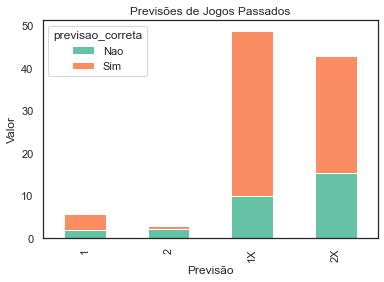

,predictions.winner.comment,predictions.winner.name,predictions.advice,tip_type,prediction,tip2,winner,previsao_correta,ttgols,overunder_correct_prediction,total_correct_prediction
0,Win or draw,Cuiaba,Double chance : Cuiaba or draw,Double chance,1X,None,X,Sim,4,-,-
1,Win or draw,Santos,Double chance : draw or Santos,Double chance,2X,None,1,Nao,3,-,-
2,Win or draw,Sao Paulo,Double chance : Sao Paulo or draw,Double chance,1X,None,X,Sim,0,-,-
3,Win or draw,Flamengo,Double chance : Flamengo or draw,Double chance,1X,None,1,Sim,1,-,-
4,Win or draw,Gremio,Double chance : draw or Gremio,Double chance,2X,None,1,Nao,5,-,-
...,...,...,...,...,...,...,...,...,...,...,...
807,Win or draw,Sao Paulo,Double chance : draw or Sao Paulo,Double chance,2X,None,X,Sim,2,-,-
808,Win or draw,Vasco DA Gama,Double chance : Vasco DA Gama or draw,Double chance,1X,None,2,Nao,1,-,-
809,None,Atletico Paranaense,Winner : Atletico Paranaense,Winner,1,None,1,Sim,5,-,-
810,None,Cruzeiro,Winner : Cruzeiro,Winner,2,None,2,Sim,4,-,-


In [75]:
pred = pred.rename(columns = {'winner_correct_prediction':'previsao_correta'})
pred['previsao_correta'] = pred['previsao_correta'].str.replace("YES",'Sim').replace("NO","Nao")
# verifica a quantidade de acertos por categoria (1, 2, 1X, 2X)
vpred = (
(
    pred.groupby(["prediction", 'previsao_correta']).size()
    / pred.shape[0]
    * 100
)
.to_frame()
.rename(columns={0: "value"})
.round(2)
)  # .plot.barh()

# group and sum the values
grouped = vpred.groupby(["prediction", 'previsao_correta'])["value"].sum()

# reshape the DataFrame
stacked = grouped.unstack()
stacked.plot.bar(stacked=True)

# set the axis labels and title
plt.xlabel("Previsão")
plt.ylabel("Valor")
plt.title("Previsões de Jogos Passados")

# show

pred_viz = plt.show()

pred

In [76]:
viz_pred(pred)

KeyError: 'value'

In [47]:
#validacao dos resultados
print(pred.groupby('tip_type').size()/len(pred)*100, '\n')
print(pred.groupby('prediction').size()/len(pred)*100, '\n')
print(pred.groupby('winner').size()/len(pred)*100, '\n')
print(pred.groupby('winner_correct_prediction').size()/len(pred)*100, '\n')
print((pred[pred['overunder_correct_prediction']!='-'].groupby('overunder_correct_prediction').size() / pred[pred['overunder_correct_prediction']!='-'].groupby('overunder_correct_prediction').size().sum())*100)
print(pred[pred['total_correct_prediction']!='-'].groupby('total_correct_prediction').size()/len(pred[pred['total_correct_prediction']!='-'])*100)

tip_type
Combo Double chance     32.456140
Combo Winner             2.412281
Double chance           58.991228
Winner                   6.140351
dtype: float64 

prediction
1      5.263158
2      3.289474
1X    49.780702
2X    41.666667
dtype: float64 

winner
1    44.956140
2    24.561404
X    30.482456
dtype: float64 

winner_correct_prediction
NO     28.289474
YES    71.710526
dtype: float64 

overunder_correct_prediction
NO     18.867925
YES    81.132075
dtype: float64
total_correct_prediction
NO     42.138365
YES    57.861635
dtype: float64
